In [93]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import math
import numpy as np

In [94]:
#CHECK UNWRAPPED DATA FOR DCD ERROR, aparently its not supposed to platauo

In [95]:
graphite_water_psf = r'C:\SZvsWorkspace\Research\MSD\data_files\wrapped\graphite_water.psf'
graphite_trajectory_dcd = r'C:\SZvsWorkspace\Research\MSD\data_files\wrapped\output_per_40ps.dcd'

global_uni = mda.Universe(graphite_water_psf,graphite_trajectory_dcd)
Oxg_uni = global_uni.select_atoms('resname SPCE and name OW')
# Importing data

c:\Users\drews\AppData\Local\Programs\Python\Python312\Lib\site-packages\MDAnalysis\coordinates\DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [96]:
def calculate_msd(position_dict):
    x_vals = np.array(position_dict['x_vals'])
    y_vals = np.array(position_dict['y_vals'])
    z_vals = np.array(position_dict['z_vals'])
    num_points = len(x_vals)
    msd = np.zeros(num_points)
    for dt in range(1, num_points):
        displacements = np.square(x_vals[dt:] - x_vals[:-dt]) + np.square(y_vals[dt:] - y_vals[:-dt]) + np.square(z_vals[dt:] - z_vals[:-dt])
        msd[dt] = np.mean(displacements)
    return msd

In [97]:
partition_height = 65
partition_cuts = 4
partition = []

for i in range(partition_cuts):
    partition.append(65 * ( (i + 1) / 4))

In [98]:
position_dict = {'x_vals':[],'y_vals':[],'z_vals':[]}
initial_part = 'DNE'

for atom_num in range(len(Oxg_uni)):
    for frame in range(len(global_uni.trajectory)):
        global_uni.trajectory[frame]
        oxg_pos = Oxg_uni.positions
        wanted_atom_pos = oxg_pos[atom_num]
        current_z = wanted_atom_pos[2]

        for i in range(len(partition)):
            if current_z < partition[i]:
                current_part = i
                break

        if frame != 0 and initial_part != current_part:
            break
        elif frame == 0:
            initial_part = current_part

        position_dict['x_vals'].append(wanted_atom_pos[0])
        position_dict['y_vals'].append(wanted_atom_pos[1])
        position_dict['z_vals'].append(wanted_atom_pos[2])

    individual_msd = calculate_msd(position_dict)
    if len(individual_msd) > 600:
        break
print(individual_msd)


[   0.          419.64630127  602.70349121  723.15618896  837.23681641
  914.72363281  980.68280029 1025.96765137 1055.69726562 1070.0435791
 1079.18579102 1100.49890137 1125.10388184 1152.26928711 1118.42077637
 1140.90380859 1139.26733398 1169.23449707 1186.40063477 1203.48583984
 1237.90966797 1263.11010742 1289.48864746 1328.65563965 1333.85375977
 1369.53967285 1384.50524902 1401.2611084  1388.57873535 1397.09313965
 1430.13183594 1439.05664062 1447.01379395 1453.52563477 1478.18334961
 1480.61206055 1505.76147461 1526.44177246 1514.39782715 1530.08215332
 1550.39221191 1551.7454834  1532.89794922 1530.12084961 1528.48950195
 1535.75292969 1540.39001465 1535.20288086 1513.23095703 1487.37255859
 1516.37609863 1513.7454834  1486.50195312 1490.96789551 1509.49304199
 1509.57556152 1499.41955566 1480.63586426 1499.91418457 1508.52832031
 1479.54650879 1462.92272949 1508.63317871 1516.7244873  1527.23022461
 1529.19128418 1513.67797852 1523.46313477 1511.27355957 1542.51135254
 1541.8

In [99]:
x_vals = np.array(position_dict['x_vals'])
print(x_vals)
print(x_vals[5:] - x_vals[:-5])

[ 7.85999680e+00  7.97156906e+00 -2.92774987e+00 -1.13045568e+01
  1.49111652e+01  1.03492527e+01 -9.03232670e+00 -8.26706409e+00
 -1.52564573e+01 -1.66614323e+01 -1.60688915e+01 -1.58791275e+01
  1.60946503e+01 -1.36288958e+01 -1.40289354e+01 -4.51798630e+00
 -3.24752569e+00  1.64416420e+00  6.67264402e-01 -4.01505375e+00
  3.45637351e-01  3.31456208e+00  4.68454742e+00  4.21718836e+00
  2.10224438e+00  1.54133689e+00  3.72328496e+00  9.69121265e+00
 -3.63851953e+00 -4.12362862e+00  1.15498281e+00 -6.16533875e-01
 -4.31194973e+00 -5.10057449e+00 -7.23473644e+00 -1.26403809e+01
  1.69464531e+01 -1.69207649e+01 -1.27848682e+01 -6.77937031e-01
 -5.64129210e+00 -1.89177942e+00  2.18732858e+00  9.29087353e+00
  2.27736568e+00  4.17381144e+00 -4.97915506e+00 -2.93289256e+00
 -2.31449270e+00 -4.00945616e+00 -5.35957193e+00 -5.84013128e+00
 -7.70827579e+00 -1.19583263e+01  1.44101410e+01  1.54229450e+01
 -1.49460802e+01  1.33486061e+01 -1.63013115e+01 -1.68529034e+01
  1.44918823e+01  1.50255

In [100]:
print(len(position_dict['z_vals']))
print(position_dict['z_vals'])
print(partition)

614
[53.64271, 55.89519, 56.34165, 60.572605, 58.34613, 52.85407, 18.737444, 22.671412, 23.50997, 21.905102, 21.953989, 23.250797, 20.455133, 20.133533, 29.680532, 27.19054, 23.668705, 24.30102, 28.881428, 28.79439, 24.758419, 24.602654, 28.180523, 28.534325, 24.21331, 22.704153, 23.274406, 22.791082, 39.710705, 42.841465, 41.768295, 40.75577, 42.275673, 49.752888, 53.073383, 54.9648, 57.625935, 53.468235, 50.296234, 5.6316934, 4.3254657, 6.78992, 10.397937, 11.498898, 11.8581505, 10.248016, 30.39757, 27.8301, 30.882515, 28.610338, 29.69148, 26.684172, 28.637323, 28.797668, 31.429016, 29.372133, 11.335971, 6.9388027, 7.0529327, 9.096815, 8.54726, 6.389476, 11.651518, 11.906477, 13.198357, 12.536074, 14.309288, 14.656464, 37.749763, 38.420074, 35.603836, 35.536724, 21.279087, 23.514172, 20.646454, 16.56895, 42.598286, 43.310516, 48.436604, 46.242233, 47.024136, 45.916225, 41.65589, 9.465385, 11.765193, 13.985513, 13.69853, 16.057957, 17.311668, 18.923063, 23.713709, 29.192307, 29.668379

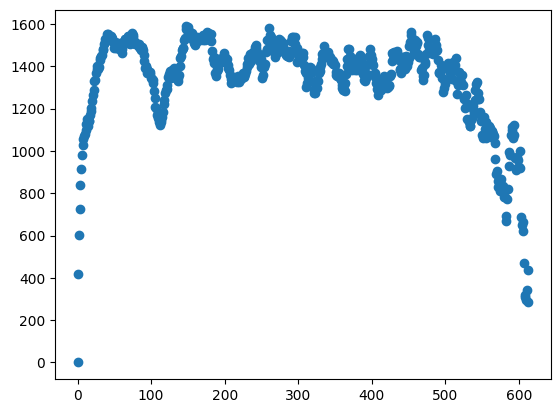

In [101]:
plt.scatter(range(len(individual_msd)), individual_msd)
plt.show()